# Mnist分类任务
* 网络基本构建与训练方法, 常用函数解析
* torch.nn.function模块
* nn.Module模块

# 读取Mnist数据集
* 会自动下载

In [73]:
%matplotlib inline

In [75]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True,exist_ok=True)

#python + 翻墙
URL="http://deeplearning.net/data/mnist/"
FILENAME="mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL+FILENAME).content
    (PATH/FILENAME).open("wb").write(content)

In [84]:
# 读取文件 将路径转换为POSIX格式，确保跨平台兼容性。
with gzip.open((PATH / FILENAME).as_posix(),"rb") as f:
    data = pickle.load(f,encoding="latin-l")
    #将数据拆解 成 训练集 、验证集 、测试集
    (x_train, y_train),(x_valid, y_valid), (x_test, y_test) = data
# 查看数据集的形状
print("训练集大小:", x_train.shape)
print("验证集大小:", x_valid.shape)
print("测试集大小:", x_test.shape)

训练集大小: (54000, 28, 28)
验证集大小: (6000, 28, 28)
测试集大小: (10000, 28, 28)


784是每个样本像素点的个数

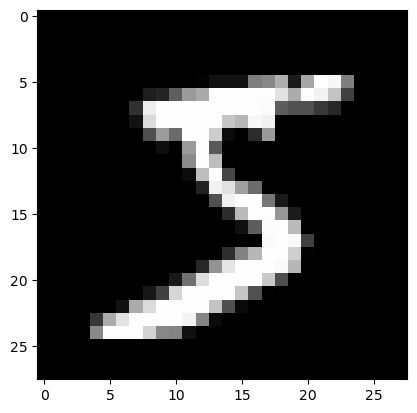

(54000, 28, 28)


In [86]:
from matplotlib import pyplot as plt 
import numpy as np

plt.imshow(x_train[0].reshape((28,28)),cmap='gray')
plt.show()
print(x_train.shape)

* tips: 网络分类任务 得到不是一个结果，而是一个概率值
* Image ->Neural Network -> [0,0.12,0,0.01,0,0,0,0,0.87]
* 分类任务是概率值

In [111]:
import torch
# 数据转换成tensor
x_train,y_train, x_valid, y_valid = map(
    torch.tensor, (x_train,y_train, x_valid, y_valid )
)
# n,c = x_train.shape
# x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train.shape)
print(y_train)
print(y_train.min(), y_train.max())

torch.Size([54000, 28, 28])
tensor([5, 0, 4,  ..., 8, 9, 8], dtype=torch.uint8)
tensor(0, dtype=torch.uint8) tensor(9, dtype=torch.uint8)


/var/folders/8_/94drxc091ks00vspl9q0jyhc0000gn/T/ipykernel_65126/385875349.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train,y_train, x_valid, y_valid = map(


# torch.nn.functional 和 torch.nn.Module


In [128]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb,weights,bias):
    return xb.mm(weights) + bias

In [136]:
bs = 64 
xb = x_train[0:bs] # mini-batch from x
yb = y_train[0:bs]
weights = torch.randn([784,10],dtype=torch.float, requires_grad = True)
bs = 64
bias = torch.zeros(10,requires_grad = True)

#loss_func(model(xb,weights,bias),yb)

In [ ]:

from torch import nn

class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        #28*28 全链接层
        self.hidden1 = nn.Linear(784,128)
        self.hidden2 = nn.Linear(128,256)
        self.out = nn.Linear(256,10)

    #前向传播 (反向传播 torch框架自动处理)
    def forward(self,x):
        #激活函数
        x=F.relu(self.hidden1(x))
        x=F.relu(self.hidden2(x))
        x=self.out(x)
        return x

net = Mnist_NN()
print(net)

#打印网络参数
for name, param in net.named_parameters():
    print(name,param,param.size())


# nn.Module

In [138]:

from torch import nn

class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        #28*28 全链接层
        self.hidden1 = nn.Linear(784,128)
        self.hidden2 = nn.Linear(128,256)
        self.out = nn.Linear(256,10)

    #前向传播 (反向传播 torch框架自动处理)
    def forward(self,x):
        #激活函数
        x=F.relu(self.hidden1(x))
        x=F.relu(self.hidden2(x))
        x=self.out(x)
        return x

net = Mnist_NN()
print(net)

#打印网络参数
for name, param in net.named_parameters():
    print(name,param,param.size())


Mnist_NN(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)
hidden1.weight Parameter containing:
tensor([[ 0.0123,  0.0323, -0.0054,  ...,  0.0046,  0.0335,  0.0040],
        [ 0.0193, -0.0354, -0.0075,  ..., -0.0175,  0.0052,  0.0291],
        [-0.0229,  0.0258, -0.0002,  ..., -0.0095,  0.0246,  0.0169],
        ...,
        [-0.0056,  0.0179, -0.0227,  ..., -0.0302,  0.0207,  0.0195],
        [ 0.0184,  0.0156, -0.0062,  ...,  0.0197, -0.0007, -0.0277],
        [-0.0072, -0.0191,  0.0143,  ...,  0.0125, -0.0051,  0.0303]],
       requires_grad=True) torch.Size([128, 784])
hidden1.bias Parameter containing:
tensor([ 0.0116,  0.0222,  0.0303,  0.0018,  0.0028,  0.0271, -0.0162,  0.0256,
         0.0082, -0.0129, -0.0255, -0.0251,  0.0011, -0.0135, -0.0074, -0.0231,
        -0.0105,  0.0258, -0.0235,  0.0242, -0.0221, -0.0004,  0.0188, -0.0141,

# 使用TensorDataset和DataLoader来简化

In [162]:

import numpy as np
import torch.nn.functional as F

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim

from torch import nn

class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        #28*28 全链接层
        self.hidden1 = nn.Linear(784,128)
        self.hidden2 = nn.Linear(128,256)
        self.out = nn.Linear(256,10)

    #前向传播 (反向传播 torch框架自动处理)
    def forward(self,x):
        #激活函数
        x=F.relu(self.hidden1(x))
        x=F.relu(self.hidden2(x))
        x=self.out(x)
        return x

loss_func = F.cross_entropy

bs = 64

train_ds = TensorDataset(x_train, y_train)
vaild_ds = TensorDataset(x_valid, y_valid)

# 方便batch取数据
def get_data(train_ds, vaild_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(vaild_ds, batch_size=bs * 2)
    )

# model.train() # 训练模式 会使用Batch Normalization 和 Dropout
# model.eval() # 验证模式 不会使用

# 训练函数
def fit(steps, model, loss_func, opt, train_dl, vaild_dl):
    for step in range(steps):
        model.train()  # 训练模式
        for xb, yb in train_dl:
            # loss_func(model,loss_func,xb,yb,opt)
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()  # 验证模式
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in vaild_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        print(f"当前{step}:验证集损失{val_loss}")




def get_model():
    model = Mnist_NN()
    return model, optim.SGD(model.parameters(), lr=0.001)


def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

def model(xb):
    return xb.mm(weights) + bias


# 实际执行
train_dl, vaild_dl = get_data(train_ds, vaild_ds, bs)
model,opt = get_model()
fit(25, model, loss_func, opt, train_dl, vaild_dl)


RuntimeError: mat1 and mat2 must have the same dtype, but got Byte and Float